In [ ]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [ ]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =9
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 8.5 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 8.5 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 11 # Overall title
plt.rcParams["axes.labelsize"] = 11 # Axes labels

In [12]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_April2023_Norm100Anhydrs.xlsx', sheet_name='Cpx-Liq')

myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']
cpx_Glass=out['my_input']
Cpx_Glass=cpx_Glass
notinLEPR= cpx_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
OldMask=~newMask
newMask=newMask.fillna(False)

mask_1GPa=cpx_Glass['P_kbar_x']<=11
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)

eq_tests=pt.calculate_cpx_liq_eq_tests(liq_comps=myLiquids1, cpx_comps=myCpxs1, P=cpx_Glass['P_kbar_x'], T=cpx_Glass['T_K_x'])

sigma=1.5
Eq_Mask=~((eq_tests['Delta_EnFs_Mollo13']<0.05)
        &(eq_tests['Delta_Kd_Put2008']<0.08) 
        &(eq_tests['Cation_Sum_Cpx'].between(3.95, 4.05))
         &(cpx_Glass['N_meas_Cpx']>=5)
         & (cpx_Glass['H2O_Liq']>0)
        
        )

xT=cpx_Glass['T_K_x'].loc[Press_new&Eq_Mask]
x=cpx_Glass['P_kbar_x'].loc[Press_new&Eq_Mask]
x_All=cpx_Glass['P_kbar_x'].loc[Press_new]
xT_All=cpx_Glass['T_K_x'].loc[Press_new]

## Masked Cpxs and Glasses
x_T_Mask=cpx_Glass['T_K_x'].loc[Press_new&Eq_Mask].reset_index(drop=True)
x_P_kbar_Mask=cpx_Glass['P_kbar_x'].loc[Press_new&Eq_Mask].reset_index(drop=True)

Cpx_Mask=myCpxs1.loc[Press_new&Eq_Mask].reset_index(drop=True)
Liq_Mask=myLiquids1.loc[Press_new&Eq_Mask].reset_index(drop=True)
cpx_Glass_Mask=cpx_Glass.loc[Press_new&Eq_Mask].reset_index(drop=True)

C:\Users\penny\AppData\Local\Temp\ipykernel_28728\3635660577.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Using Fe3FeT from input file to calculate Kd Fe-Mg


In [13]:
## Ones in Wang
InWang=(cpx_Glass_Mask['Citation_x'].str.contains('Berndt2005_notinLEPR')
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Husen2016_notinLEPR'))
                                               
cpx_Glass_Mask_Wang=cpx_Glass_Mask.loc[~InWang].reset_index(drop=True)
Cpx_Mask_Wang=Cpx_Mask.loc[~InWang].reset_index(drop=True)
Liq_Mask_Wang=Liq_Mask.loc[~InWang].reset_index(drop=True)
x_T_Mask_Wang=x_T_Mask.loc[~InWang].reset_index(drop=True)
x_P_kbar_Mask_Wang=x_P_kbar_Mask.loc[~InWang].reset_index(drop=True)                                               

In [14]:
InJorg=(cpx_Glass_Mask['Citation_x'].str.contains('Kraw2013')
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Berndt2005')   
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Feig2010')   
        
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Nandekar2014_notinLEPR')   

    |
     cpx_Glass_Mask['Citation_x'].str.contains('Melekhova2015_notinLEPR')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Ulmer2018')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Almeev2013')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Parat2014_notinLEPR')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Husen2016_notinLEPR')      

       
       )

cpx_Glass_Mask_Jorg=cpx_Glass_Mask.loc[~InJorg].reset_index(drop=True)
Cpx_Mask_Jorg=Cpx_Mask.loc[~InJorg].reset_index(drop=True)
Liq_Mask_Jorg=Liq_Mask.loc[~InJorg].reset_index(drop=True)
x_T_Mask_Jorg=x_T_Mask.loc[~InJorg].reset_index(drop=True)
x_P_kbar_Mask_Jorg=x_P_kbar_Mask.loc[~InJorg].reset_index(drop=True)

In [15]:
Cpx_Mask_All=Cpx_Mask.loc[(~InJorg)&(~InWang)].reset_index(drop=True)
Liq_Mask_All=Liq_Mask.loc[(~InJorg)&(~InWang)].reset_index(drop=True)
cpx_Glass_Mask_All=cpx_Glass_Mask.loc[(~InJorg)&(~InWang)].reset_index(drop=True)

x_T_Mask_All=x_T_Mask.loc[(~InJorg)&(~InWang)].reset_index(drop=True)
x_P_kbar_Mask_All=x_P_kbar_Mask.loc[(~InJorg)&(~InWang)].reset_index(drop=True)

In [16]:
Calc=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_Mask_All, H2O_Liq=Liq_Mask_All['H2O_Liq'])
Calc.head()

,P_Wang21_eq1,T_Wang21_eq2,T_Jorgenson22,P_Jorgenson22,T_Petrelli20,T_Petrelli21_H2O,P_Petrelli21_H2O,T_Put_Teq32d_Peq32a,T_Put_Teq32d_Peq32b,P_Petrelli20,P_Put_Teq32d_Peq32a,P_Put_Teq32d_Peq32b,"Jd_from 0=Na, 1=Al",SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,H2O_Liq,T_Put_Teq32d_subsol_Peq32a,T_Put_Teq32d_subsol_Peq32b,P_Put_Teq32d_subsol_Peq32a,P_Put_Teq32d_subsol_Peq32b
0,6.005435,1430.009976,1389.856468,4.572289,1400.312222,1447.050000,5.923544,1517.682083,1521.712056,6.111387,8.509274,8.986304,0,52.2,0.27,4.61,6.43,0.14,16.6,19.5,0.25,0.01,0.0,370,1.905797,0.903489,0.196324,0.762806,0.198365,0.017697,0.000466,0.004329,0.007415,0.0,0.0,0.094203,0.104162,0.485064,0.105402,0.409534,3.996687,0.409534,0.000000,0.196324,0.000000,0.0,0.195319,0.821488,0.017697,0.086465,0.003869,0.672472,0.213670,0.672472,0.550265,-0.007092,0.203416,2.9,1331.043001,1317.204695,4.812541,3.480491
1,4.437302,1386.686852,1348.667413,6.571910,1385.998889,1436.867778,5.877149,1497.629655,1485.045359,5.563996,8.118293,6.612022,0,49.4,0.42,6.29,7.40,0.18,16.0,20.0,0.30,0.01,0.0,371,1.824324,0.880853,0.228540,0.791367,0.273768,0.021480,0.000471,0.005630,0.011667,0.0,0.0,0.175676,0.098092,0.463421,0.120236,0.416342,4.038101,0.416342,0.075731,0.152809,0.331369,0.0,0.159078,0.793990,0.021480,0.076611,0.049532,0.665224,0.222085,0.665224,0.525517,0.075731,0.152809,2.7,1288.502769,1249.649681,5.722182,1.831350
2,7.428633,1452.046887,1414.513184,8.597418,1460.944444,1466.008889,9.370100,1505.270151,1478.043110,9.293491,10.621453,7.333791,0,50.0,0.44,6.14,11.80,0.28,17.2,13.9,0.31,0.01,0.0,372,1.846572,0.946964,0.364447,0.550027,0.267252,0.022198,0.000471,0.008759,0.012223,0.0,0.0,0.153428,0.113825,0.508727,0.195788,0.295485,4.018913,0.295485,0.037355,0.327092,0.102497,0.0,0.365362,0.722089,0.022198,0.091627,0.030900,0.427500,0.441955,0.427500,0.306648,0.037355,0.327092,0.0,1448.231595,1410.685553,8.728553,5.305363
3,6.977120,1419.361182,1490.468408,9.732766,1517.038889,1516.814444,9.367431,1528.817459,1502.107857,9.327038,10.896676,7.716363,0,48.6,0.50,8.94,8.44,0.19,16.6,16.5,0.27,0.01,0.0,373,1.781636,0.907192,0.258750,0.648097,0.386258,0.019191,0.000468,0.005900,0.013787,0.0,0.0,0.218364,0.167893,0.500095,0.142638,0.357267,4.021278,0.357267,0.042087,0.216663,0.162656,0.0,0.264813,0.778070,0.019191,0.148702,0.034831,0.464563,0.350690,0.464563,0.359646,0.042087,0.216663,1.8,1400.778092,1365.901775,7.037295,3.791901
4,5.489511,1370.957948,1343.050498,7.702950,1356.216667,1381.892222,7.474760,1508.312283,1486.959633,7.686018,10.277207,7.708951,0,47.6,0.39,8.79,8.61,0.16,14.6,19.6,0.34,0.01,0.0,376,1.765537,0.807293,0.267072,0.778931,0.384252,0.024451,0.000473,0.005027,0.010881,0.0,0.0,0.234463,0.149789,0.435598,0.144107,0.420295,4.043918,0.420295,0.087363,0.179710,0.327112,0.0,0.156016,0.751408,0.024451,0.125338,0.054562,0.599031,0.237667,0.599031,0.448024,0.087363,0.179710,2.8,1295.429647,1251.052246,7.343415,2.867591


In [17]:
CalcLiq=pt.calculate_cpx_liq_press_all_eqs(cpx_comps=Cpx_Mask_All, liq_comps=Liq_Mask_All,
                                            H2O_Liq=Liq_Mask_All['H2O_Liq'])
CalcLiq.head()

We have reset the index on Cpx and Liq comps for the Petrelli expressions
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function


,"P_kbar: (P_Neave17, T_Put2008_eq33)","T_K: (P_Neave17, T_Put2008_eq33)","P_kbar: (P_Neave17, T_Put2008_eq34_cpx_sat)","T_K: (P_Neave17, T_Put2008_eq34_cpx_sat)","P_kbar: (P_Put2008_eq30, T_Put2008_eq33)","T_K: (P_Put2008_eq30, T_Put2008_eq33)","P_kbar: (P_Put2008_eq31, T_Put2008_eq33)","T_K: (P_Put2008_eq31, T_Put2008_eq33)","P_kbar: (P_Put2008_eq32c, T_Put2008_eq33)","T_K: (P_Put2008_eq32c, T_Put2008_eq33)","P_kbar: (P_Put2008_eq32c, T_Put2003)","T_K: (P_Put2008_eq32c, T_Put2003)","P_kbar: (P_Put2008_eq32c, T_Put2008_eq32d)","T_K: (P_Put2008_eq32c, T_Put2008_eq32d))","P_kbar: (P_Put2008_eq32c, default spreadsheet 1st cell)","P_kbar: (P_Put2008_eq32c, default spreadsheet 2 on)","P_kbar: (P_Put2008_eq32c, T_Put2008_eq34)","T_K: (P_Put2008_eq32c, T_Put2008_eq34))",P_kbar: (P2003 P&T),T_K: (P2003 P&T),"P_kbar: (Petrelli, 2020)","T_K: (Petrelli, 2020)","P_kbar: (Jorgeson, 2022)","T_K: (Jorgeson, 2022)","T_K: (P_Put1996_eqP1, T_Put1996_eqT2)","P_kbar: (P_Put1996_eqP1, T_Put1996_eqT2)"
0,4.121736,1400.836540,4.315815,1422.083606,3.424976,1397.154581,5.872373,1410.173814,2.465043,1392.113500,6.880634,1485.073305,8.376117,1516.557170,6.082870,6.702488,3.575155,1415.484279,4.535424,1481.811638,5.720586,1386.557273,5.499393,1394.055473,1481.322879,5.192422
1,4.423857,1400.360186,4.592201,1418.310827,3.862276,1397.393069,7.347448,1416.012814,7.123909,1414.803666,10.501563,1485.912171,12.992404,1538.350927,9.735241,10.396703,9.264018,1459.858595,4.899250,1478.135533,5.872763,1384.477273,5.743995,1374.682338,1483.704596,5.826147
2,7.025754,1460.055312,7.052539,1462.638236,5.701114,1452.470614,9.337377,1473.482810,5.970135,1454.004604,7.707163,1490.573622,6.968117,1475.014748,6.256709,6.392642,5.861991,1451.727889,6.282178,1488.575363,8.036246,1453.604545,7.080353,1431.194776,1462.899484,5.900689
3,7.534567,1457.004168,7.648564,1468.601503,5.672410,1446.408417,8.720229,1463.831902,8.100307,1460.254069,11.033782,1522.011430,11.662624,1535.250208,9.478080,9.986264,9.156507,1482.489851,6.676601,1515.658968,9.919837,1479.590000,10.058199,1495.941045,1499.958420,6.769401
4,7.557603,1427.747723,7.881560,1457.313504,6.136486,1419.968725,8.722540,1434.188287,8.663284,1433.859279,12.378251,1512.069108,13.454620,1534.729506,11.707126,12.333511,11.209849,1487.471171,7.757003,1505.420879,7.697737,1417.775455,8.486234,1414.702239,1511.127215,8.702369


In [18]:
a=cpx_Glass_Mask_All['P_kbar_x']
roundedP=np.round(a / 0.2) * 0.2
#roundedP=pd.Series(np.round(cpx_Glass_Mask_All['P_kbar_x'], 1))
#roundedP = pd.Series((2 * np.round(cpx_Glass_Mask_All['P_kbar_x'] / 2, 1)))
vals=np.unique(np.sort(roundedP)) #.unique()
vals

array([ 0.4,  1. ,  1.2,  1.6,  2. ,  2.2,  3. ,  4. ,  4.2,  5. ,  6. ,
        7. ,  9. ,  9.6, 10. ])

In [19]:
k=0

P=0.4
number of Cpx=12
number studies=2
P=1.0
number of Cpx=111
number studies=11
P=2.0
number of Cpx=324
number studies=78
P=2.2
number of Cpx=8
number studies=3
P=3.0
number of Cpx=147
number studies=5
P=4.0
number of Cpx=57
number studies=15


C:\Users\penny\AppData\Local\Temp\ipykernel_28728\530847086.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k" (-> color='k'). The keyword argument will take precedence.
  ax0.plot(x_P_kbar_Mask_All.loc[RelevantP],
C:\Users\penny\AppData\Local\Temp\ipykernel_28728\530847086.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k" (-> color='k'). The keyword argument will take precedence.
  ax1.plot(x_P_kbar_Mask_All.loc[RelevantP],
C:\Users\penny\AppData\Local\Temp\ipykernel_28728\530847086.py:65: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k" (-> color='k'). The keyword argument will take precedence.
  ax2.plot(x_P_kbar_Mask_All.loc[RelevantP],
C:\Users\penny\AppData\Local\Temp\ipykernel_28728\530847086.py:69: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k" (-> color='k'). The keyword 

P=4.2
number of Cpx=37
number studies=13
P=6.0
number of Cpx=145
number studies=5
P=7.0
number of Cpx=203
number studies=28
P=9.0
number of Cpx=128
number studies=7
P=9.600000000000001
number of Cpx=4
number studies=2


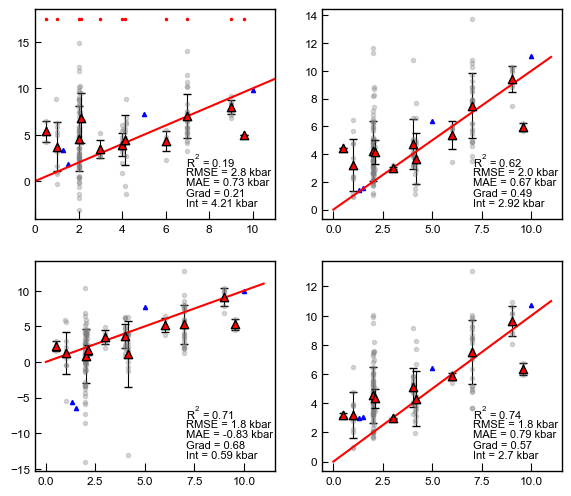

In [20]:

import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore', category=UserWarning)

    w.simplefilter('ignore')
    
    from matplotlib import patches
    

    
    num_to_Av=0
yes='V'
if yes=='T':
    print('duh')
else:

        fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize = (6.8,6)) # adjust dimensions of figure here
        
        ax0.set_xlim([0, 11])





        ## 1 to 1 lines for each plot
        ax0.plot([0, 11], [0, 11], '-r')
        ax1.plot([0, 11], [0, 11], '-r')
        ax2.plot([0, 11], [0, 11], '-r')
        ax3.plot([0, 11], [0, 11], '-r')



        ## Plotting all experiments

        j=0


        ax0_x=np.empty(len(vals))
        ax0_y=np.empty(len(vals))
        ax1_x=np.empty(len(vals))
        ax1_y=np.empty(len(vals))
        ax2_x=np.empty(len(vals))
        ax2_y=np.empty(len(vals))
        ax3_x=np.empty(len(vals))
        ax3_y=np.empty(len(vals))
        P=np.empty([len(vals)], 'float')
        for press in vals:

            RelevantP=(roundedP==press) #P[j]) #&  (cpx_Glass_Mask_All['P_kbar_x']>P[j]+0.1)    
            
            Nanalys=sum(cpx_Glass_Mask_All['N_meas_Cpx'].loc[RelevantP])
            N_Exp=len(cpx_Glass_Mask_All['Experiment_x'].loc[RelevantP].unique())
            
            Keep=(Nanalys>=num_to_Av)&(N_Exp>1)
            if Keep is False:
                #print('Not enough P='+str(press))
                ax0.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    Calc['P_Wang21_eq1'].loc[RelevantP], 
                 '^k', color='blue', alpha=1, zorder=0, ms=3)

                ax1.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    Calc['P_Jorgenson22'].loc[RelevantP], 
                 '^k', color='blue', alpha=1, zorder=0, ms=3)

                ax2.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP], 
                 '^k', color='blue', alpha=1, zorder=0, ms=3)

                ax3.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP], 
                 '^k', color='blue', alpha=1, zorder=0, ms=3)

                ax0_x[j]=np.nan
                ax0_y[j]=np.nan
                ax1_x[j]=np.nan
                ax1_y[j]=np.nan
                ax2_x[j]=np.nan
                ax2_y[j]=np.nan
                ax3_x[j]=np.nan
                ax3_y[j]=np.nan
            else:
                print('P='+str(press))
                print('number of Cpx='+str((Nanalys)))
                print('number studies='+str(sum(RelevantP)))
                #Plotting dots for each datapoint in a given bin on all 4 subplots

                msl=3


            # Plotting the money shot of the errorbar
                ax0.errorbar(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                        np.nanmean(Calc['P_Wang21_eq1'].loc[RelevantP]),
                         xerr=np.nanstd(x_P_kbar_Mask_All.loc[RelevantP]), 
                         yerr=np.nanstd(Calc['P_Wang21_eq1'].loc[RelevantP]),capsize=3,
                     fmt='^', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', zorder=0)

                ax0_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax0_y[j]=np.nanmean(Calc['P_Wang21_eq1'].loc[RelevantP])

                ax1.errorbar(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(Calc['P_Jorgenson22'].loc[RelevantP]),
                             xerr=np.nanstd(x_P_kbar_Mask_All.loc[RelevantP]), 
                             yerr=np.nanstd(Calc['P_Jorgenson22'].loc[RelevantP]),capsize=3,
                         fmt='^', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', zorder=0)

                ax1_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax1_y[j]=np.nanmean(Calc['P_Jorgenson22'].loc[RelevantP])

                ax2.errorbar(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP]),
                             xerr=np.nanstd(x_P_kbar_Mask_All.loc[RelevantP]), 
                             yerr=np.nanstd(CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP]),capsize=3,
                         fmt='^', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', zorder=0)

                ax2_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax2_y[j]=np.nanmean(CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP])

                ax3.errorbar(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP]),
                             xerr=np.nanstd(x_P_kbar_Mask_All.loc[RelevantP]), 
                             yerr=np.nanstd(CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP]),capsize=3,
                         fmt='^', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', zorder=0)

                ax3_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax3_y[j]=np.nanmean(CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP])



                # Symbol by size of number of  averages
                s=ax0.scatter(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(Calc['P_Wang21_eq1'].loc[RelevantP]),
                              marker='^',
                            cmap='hot', ec='k', 
                              c='red', 
                                vmin = 5, vmax = 44,  zorder=100)  

                ax0.plot(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            17.5+0*np.nanmean(Calc['P_Wang21_eq1'].loc[RelevantP]),
                            '.r', ms=3)
                s=ax1.scatter(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(Calc['P_Jorgenson22'].loc[RelevantP]),
                               marker='^',
                             cmap='hot', ec='k', 
                              c='red',
                               vmin = 5, vmax = 44,   zorder=100)    
                s=ax2.scatter(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP]),
                             marker='^',
                              cmap='hot', ec='k', 
                              c='red',
                            vmin = 5, vmax = 44,      zorder=100)      
                s=ax3.scatter(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP]),
                            marker='^',
                              cmap='hot', ec='k', 
                              c='red',
            vmin = 5, vmax = 44, zorder=100)

                ax0.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    Calc['P_Wang21_eq1'].loc[RelevantP], 
                 '.', color='grey', alpha=0.3, zorder=0)




                ax1.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    Calc['P_Jorgenson22'].loc[RelevantP], 
                 '.', color='grey', alpha=0.3, zorder=0)

                ax2.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP], 
                 '.', color='grey', alpha=0.3, zorder=0)

                ax3.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP], 
                 '.', color='grey', alpha=0.3, zorder=0)

            j=j+1




        # Adding statistics thro averages. 
        ax0_stats=pt.calculate_R2_Tukey(pd.Series(ax0_x), pd.Series(ax0_y)) 
        ax0_stats_noround=pt.calculate_R2(pd.Series(ax0_x), pd.Series(ax0_y))


        ax0.annotate("R$^{2}$ = "+str(ax0_stats['R$^{2}$']),
                               xy=(0.63, 0.25), xycoords="axes fraction", fontsize=8)
        ax0.annotate("RMSE = "+str(ax0_stats['RMSE_num']) +" kbar",
                                   xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
        ax0.annotate("MAE = "+str(ax0_stats['Mean Error']) +" kbar",
                                   xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
        ax0.annotate("Grad = "+str(ax0_stats['Grad']),
                                   xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
        ax0.annotate("Int = "+str(ax0_stats['Int']) +" kbar",
                                   xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)

        ax1_stats=pt.calculate_R2_Tukey(pd.Series(ax1_x), pd.Series(ax1_y)) 
        ax1_stats_noround=pt.calculate_R2(pd.Series(ax1_x), pd.Series(ax1_y))

        ax1.annotate("R$^{2}$ = "+str(ax1_stats['R$^{2}$']),
                               xy=(0.63, 0.25), xycoords="axes fraction", fontsize=8)
        ax1.annotate("RMSE = "+str(ax1_stats['RMSE_num']) +" kbar",
                                   xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
        ax1.annotate("MAE = "+str(ax1_stats['Mean Error']) +" kbar",
                                   xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
        ax1.annotate("Grad = "+str(ax1_stats['Grad']),
                                   xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
        ax1.annotate("Int = "+str(ax1_stats['Int']) +" kbar",
                                   xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
        
        # Put2008 Neave
        ax2_stats=pt.calculate_R2_Tukey(pd.Series(ax2_x), pd.Series(ax2_y)) 
        ax2_stats_noround=pt.calculate_R2(pd.Series(ax2_x), pd.Series(ax2_y))


        ax2.annotate("R$^{2}$ = "+str(ax2_stats['R$^{2}$']),
                               xy=(0.63, 0.25), xycoords="axes fraction", fontsize=8)
        ax2.annotate("RMSE = "+str(ax2_stats['RMSE_num']) +" kbar",
                                   xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
        ax2.annotate("MAE = "+str(ax2_stats['Mean Error']) +" kbar",
                                   xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
        ax2.annotate("Grad = "+str(ax2_stats['Grad']),
                                   xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
        ax2.annotate("Int = "+str(ax2_stats['Int']) +" kbar",
                                   xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)

        # Jorgenson Cpx-liq
        ax3_stats=pt.calculate_R2_Tukey(pd.Series(ax3_x), pd.Series(ax3_y)) 
        ax3_stats_noround=pt.calculate_R2(pd.Series(ax3_x), pd.Series(ax3_y))


        ax3.annotate("R$^{2}$ = "+str(ax3_stats['R$^{2}$']),
                               xy=(0.63, 0.25), xycoords="axes fraction", fontsize=8)
        ax3.annotate("RMSE = "+str(ax3_stats['RMSE_num']) +" kbar",
                                   xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
        ax3.annotate("MAE = "+str(ax3_stats['Mean Error']) +" kbar",
                                   xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
        ax3.annotate("Grad = "+str(ax3_stats['Grad']),
                                   xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
        ax3.annotate("Int = "+str(ax3_stats['Int']) +" kbar",
                                   xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
        
        k=k+1
